In [11]:
import itertools
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.python.client import device_lib

from tensorflow import keras
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Activation, Flatten
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model

# silence warnings
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# local imports
from load_dataset import *

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4624)])


In [3]:
xtrain,ytrain = pickle.load(open("Data/prep/" + "train.p","rb"))
xval,yval = pickle.load(open("Data/prep/" + "val.p","rb"))
xtest,ytest = pickle.load(open("Data/prep/" + "test.p","rb"))

In [4]:
xtrain = preprocess_input(xtrain)
xval = preprocess_input(xval)
xtest = preprocess_input(xtest)
extractor_model = InceptionV3(weights='imagenet', include_top=False)

In [5]:
xtrain = extractor_model.predict(xtrain)
xval = extractor_model.predict(xval)
xtest = extractor_model.predict(xtest)

In [6]:
xtrain.shape

(96, 5, 5, 2048)

In [26]:
# linear softmax model
num_categories = ytrain.shape[1]
input_shape = xtrain.shape[1:]
input_shape

(5, 5, 2048)

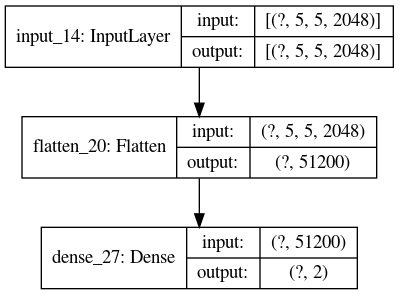

In [48]:
inputs = Input(shape=input_shape)                 # input layer
flat = Flatten()(inputs)
outputs = Dense(num_categories, activation='softmax')(flat) # output layer
model = Model(inputs, outputs)

plot_model(model, show_shapes=True)

In [49]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
xtrain.shape,ytrain.shape,xval.shape,yval.shape

((96, 5, 5, 2048), (96, 2), (24, 5, 5, 2048), (24, 2))

In [51]:
model.fit(xtrain,
           ytrain,
           validation_data=(xval,yval),
           epochs=1)

Train on 96 samples, validate on 24 samples
96/96 [==============================] - 0s 3ms/sample - loss: 0.4808 - accuracy: 0.7812 - val_loss: 0.0118 - val_accuracy: 1.0000
